In [3]:
import pandas as pd

# Load the Excel file
file_path = "data/FibroPredCODIFICADA.xlsx"
df = pd.read_excel(file_path, skiprows=1)


In [ ]:
df.columns

In [ ]:
df['Final diagnosis'].unique()

In [20]:
pd.set_option('display.max_columns', None)
display(df)

,Pedigree,Sex,FamilialvsSporadic,COD NUMBER,Age at diagnosis,Binary diagnosis,Final diagnosis,TOBACCO,Detail,Comorbidities,Radiological Pattern,Detail on NON UIP,Biopsy,Pathology Pattern Binary,"Pathology pattern UIP, probable or CHP",Pathology pattern,Extras AP,Diagnosis after Biopsy,Multidsciplinary committee,Pirfenidone,Nintedanib,Antifibrotic Drug,Prednisone,Mycophenolate,Treatment,Extrapulmonary affectation,Type of telomeric extrapulmonary affectation,Extra,Associated lung cancer,Other cancer,Type of neoplasia,Hematological abnormality before diagnosis,Blood count abnormality at diagnosis,Anemia,Thrombocytopenia,Thrombocytosis,Lymphocytosis,Lymphopenia,Neutrophilia,Neutropenia,Leukocytosis,Leukopenia,Hematologic Disease,Liver abnormality before diagnosis,Liver abnormality,LDH,ALT,AST,ALP,GGT,Transaminitis,Cholestasis,Type of liver abnormality,Liver disease,FVC (L) at diagnosis,FVC (%) at diagnosis,DLCO (%) at diagnosis,FVC (L) 1 year after diagnosis,FVC (%) 1 year after diagnosis,DLCO (%) 1 year after diagnosis,RadioWorsening2y,Necessity of transplantation,Transplantation date,Death,Cause of death,Identified Infection,Date of death,Type of family history,1st degree relative,2nd degree relative,More than 1 relative,Genetic mutation studied in patient,Mutation Type,Severity of telomere shortening,Severity of telomere shortening - Transform 4,Progressive disease,ProgressiveDisease,Got_transplant
0,1,Male,Familial,13820545,70.0,No IPF,3,2,Tobacco-associated,0,UIP,NaN,0.0,NaN,NaN,0,NaN,-9.0,1.0,1,0,1,0,0,Pirfenidone,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,Yes,Yes,1,0,0,0,0,0,0,LDH,No,2.95,79.9,43.4,2.67,67.0,27.0,1.0,0.0,No transplantation,Yes,Respiratory excerbation,NaN,2018-07-10 00:00:00,CPFE,1,0,0,1.0,NaN,3.0,6.0,1.0,1.0,0
1,2,Male,Familial,12974225,66.0,No IPF,8,2,NaN,1,Probable UIP,NaN,0.0,NON UIP,NaN,Necrotizing vasculitis,NaN,1.0,1.0,1,0,1,1,1,"Pirfenidone, Prednisone, MMF, Rituximab, Tacro...",0.0,NaN,NaN,0.0,1.0,Kaposi Sarcoma,Yes,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,Yes,Yes,1,0,0,0,0,0,0,LDH,No,2.84,75.4,48.1,2.76,53.0,53.0,0.0,0.0,No transplantation,No,No death,NaN,Not dead,Unspecified PF,1,0,1,1.0,NaN,1.0,4.0,1.0,1.0,0
2,3,Male,Familial,13551148,59.0,No IPF,3,2,Tobacco-associated,0,UIP,NaN,1.0,UIP,UIP,UIP,NaN,1.0,1.0,1,1,1,0,0,"Nintedanib, Pirfenidone",0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No,Yes,1,1,1,0,1,1,1,"LDH, ALT, AST, GGT",No,2.56,83.8,32.6,2.91,88.4,28.4,1.0,1.0,2020-12-22 00:00:00,No,No death,NaN,Not dead,Unspecified PF,1,0,0,1.0,NaN,3.0,6.0,1.0,1.0,1
3,4,Female,Familial,13597482,66.0,IPF,1,0,Organizing,1,Non UIP,Fibrosing Organizing Pneumonia,1.0,UIP,UIP,UIP,Organizativa,1.0,1.0,1,1,1,1,0,"Nintedanib, pirfenidone, prednisone",1.0,"Neutrophilia, Lymphopenia",NaN,1.0,0.0,Lung ADK,Yes,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,No,No,Yes,1,1,1,1,1,1,1,"LDH, AST, ALT, FA, GGT",No,1.76,95.5,64.5,1.28,53.6,43.6,0.0,0.0,No transplantation,Yes,Lung fibrosis progression,NaN,2018-01-11 00:00:00,NaN,1,0,0,0.0,NaN,4.0,3.0,1.0,1.0,0
4,5,Male,Familial,10572432,72.0,IPF,1,0,NaN,1,Probable UIP,NaN,0.0,NaN,NaN,0,NaN,-9.0,1.0,1,0,1,0,0,Pirfenidone,1.0,Thalassemia,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Thalassemia,NaN,No,0,0,0,0,0,0,0,NaN,No,1.94,74.9,69.0,3.11,78.6,58.6,0.0,0.0,No transplantation,No,No death,NaN,Not dead,"IPF, Dendriform ossification, GPA, IPAF",1,0,1,1.0,TERT Exon 2b/HT/c.835G>A / p.Ala279Thr/ rs6174...,3.0,6.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,0,Female,Sporadic,13621914,76.0,No IPF,6,0,"Aviary, Fungi",1,Non UIP,NaN,2.0,NON UIP,CHP,CHP,NaN,-9.0,1.0,0,0,0,1,0,Prednisone,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

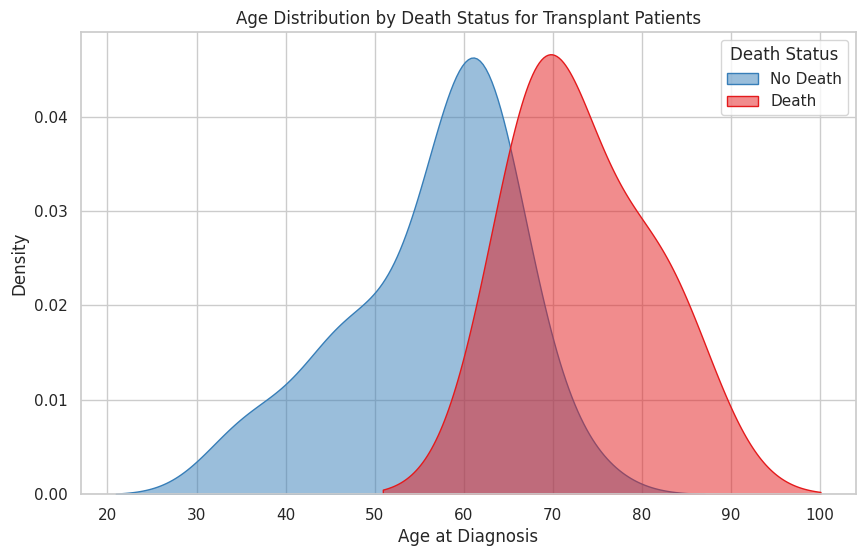

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create a column indicating if the patient got a transplant
df['Got_transplant'] = df['Transplantation date'].apply(lambda x: 1 if x != 'No transplantation' else 0)

# Filter for patients who got a transplant
df_transplant = df[df['Got_transplant'] == 1]

# Plot KDE for Death vs No Death
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df_transplant,
    x='Age at diagnosis',
    hue='ProgressiveDisease',  # Replace with the correct death column if different
    fill=True,
    palette='Set1',
    common_norm=False,
    alpha=0.5
)
plt.xlabel('Age at Diagnosis')
plt.ylabel('Density')
plt.title('Age Distribution by Death Status for Transplant Patients')
plt.legend(title='Death Status', labels=['No Death', 'Death'])
plt.show()

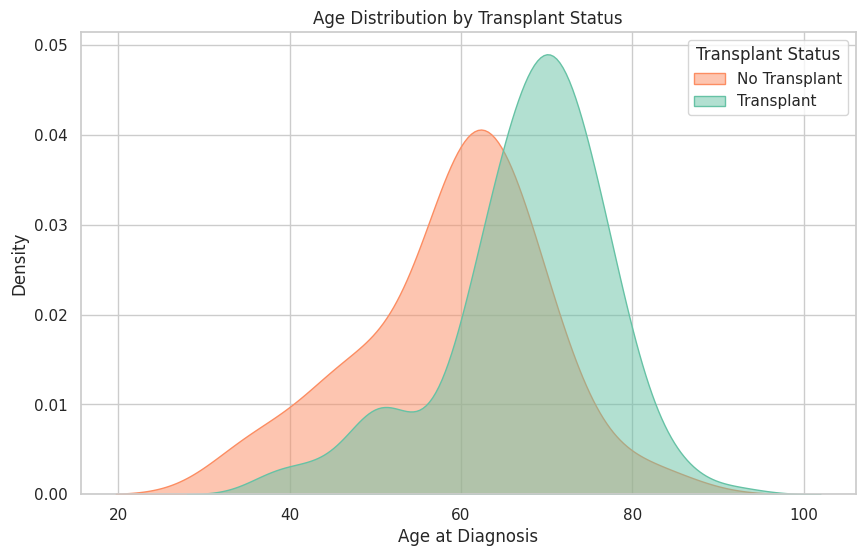

In [19]:
df['Got_transplant'] = df['Transplantation date'].apply(lambda x: 1 if x != 'No transplantation' else 0)

# Plot KDE for Transplant vs No Transplant based on Age
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df,
    x='Age at diagnosis',
    hue='Got_transplant',
    fill=True,
    palette='Set2',
    common_norm=False,
    alpha=0.5
)
plt.xlabel('Age at Diagnosis')
plt.ylabel('Density')
plt.title('Age Distribution by Transplant Status')
plt.legend(title='Transplant Status', labels=['No Transplant', 'Transplant'])
plt.show()